In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# Scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할
from sklearn.model_selection import train_test_split

# 로지스틱 회귀
from statsmodels.api import Logit

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier

# 평가함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

# column counter
from collections import Counter

import graphviz

from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import os

In [2]:
matplotlib.rc("font", family="NanumGothic")
plt.rcParams['axes.unicode_minus']=False
os.environ['PATH']+=os.pathsep+"~/anaconda3/lib/python3.7/site-packages"

In [3]:
import warnings

warnings.filterwarnings("ignore")

In [7]:
#==================================================================
# fun_check_class_level(v_data, v_start=None, v_pattern=None)
# 범주형 변수 수준 및 자료 수 확인
# -.input:
# v_data:input data, v_start:입력 문자로 시작하는 변수명 탐색, v_pattern:입력 문자를 포함하는 변수명 탐색
# -call function:fun_select_cols
# -.output:
#
#==================================================================
def fun_check_class_level(v_data, v_start=None, v_pattern=None):

    for v_col in list_cols:
        print()    
        print("변수: ", v_col, "Level = ",Counter(v_data[v_col]))

#=======================다===========================================
# fun_plot_hist(v_data, yvar, xvar, alpha = 0.5)
# Histogram, 범주형 변수의 수준(level)별 색깔 구분
# -.input:
# v_data:input data, yvar:목표변수(범주형), x:분석변수(연속형), alpha:transparency(투명도)
# -.output:
#
#==================================================================
def fun_plot_hist(v_data, yvar, xvar, alpha = 0.5):
    levels = v_data[yvar].unique()
    for level in levels:
        plt.hist(v_data[v_data[yvar] == level][xvar], label = level, alpha = alpha)
    plt.title(xvar)
    plt.legend()

#==================================================================
# fun_stat_by_class(v_data, var_anal, var_class = "JUDGE")
# 범주형 변수 수준별 분석 변수 통계량 생성
# -.input:
#   v_data:input data, var_class:범주형 변수, var_anal:분석 변수
# -.output:
#
#==================================================================
def fun_bstat_by_class(v_data, var_anal, var_class ):    
    _tmp = v_data.groupby(var_class)[var_anal].describe().T
    _tmp.reset_index(inplace = True)
    return pd.pivot_table(data = _tmp, index = "level_0", columns = "level_1", values = list(np.unique(v_data[var_class])))

#==================================================================
# fun_anova(v_data, yvar, xvar)
# 분산분석(ANOVA), stats.f_oneway() 활용
# -.input:다
# v_data:input data, yvar:목표변수(범주형), x:분석변수(연속형) -일반적인 명칭 구분과 상이함
# -.output:
# fv:F 통계량, pv:p-value(F)다
#
#==================================================================
def fun_anova(v_data, yvar, xvar):
    dict_data = dict()
    y_level = v_data[yvar].unique()
    for i in y_level:
        dict_data[i] = v_data[v_data[yvar] == i][xvar]
    fv, pv = stats.f_oneway(dict_data[y_level[0]], dict_data[y_level[1]])
   
    #print("분석 통계량 => ")
    #print("statistic:(F) {0:.3f}, p-value: {1:.3f}".format(fv, pv))
    return fv, pv

#==================================================================
# fun_chi2(v_data, yvar, xvar, heatmap = True, print_crosstab = True)
# 카이제곱 분석
# -.input:다
#   v_data:input data, yvar:Y축, 목표변수(범주형), xvar:X축, 분석변수(범주형),
#   heatmap:heatmap 표시, print_crosstab:교차표(cross tabulate) 표시
# -.output:
#
#==================================================================
def fun_chi2(v_data, yvar, xvar, heatmap = True, print_crosstab = True):    
    _tmp_cross = pd.crosstab(v_data[yvar], v_data[xvar])
    chi2, p, dof, expt = stats.chi2_contingency(_tmp_cross)
    print("카이제곱 통계량 =>")
    print("Chi2: {0:.3f}, p-value: {1:.3f}".format(chi2, p))
   
    # heatmap
    if heatmap:
        cmap = sns.cubehelix_palette(as_cmap=True)
        sns.heatmap(_tmp_cross, cmap = cmap, annot=True, fmt="d")
        plt.title(xvar)
        plt.show()
       
    # print data
    if print_crosstab:
        print("교차표(빈도) =>")        
        print(_tmp_cross)
        print()
        print("교차표(확률) =>")            
        print(pd.crosstab(v_data[yvar], v_data[xvar], normalize = "columns"))
    return chi2, p

#==================================================================
# fun_select_cols(v_data, pattern = None, start = None)
# 변수명 선택 및 리스트 생성
# -.input:
# v_data:input data, start:입력 문자로 시작하는 변수명 탐색, pattern:입력 문자를 포함하는 변수명 탐색
# -.output:
#다
#==================================================================
def fun_select_cols(v_data, pattern = None, start = None):
    cols = v_data.columns.tolist()
    if pattern:
        cols = [col for col in cols if col.find(pattern) > -1]
    if start:
        cols = [col for col in cols if col.startswith(start) > 0]
    return cols



In [5]:
data=pd.read_csv("data/sh_process_n_time.csv", encoding="utf-8")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 119 entries, JUDGE to MC_8AGING
dtypes: float64(43), int64(56), object(20)
memory usage: 3.6+ MB


In [6]:
for c in data.columns:
    print(c)

JUDGE
LOT_ID
PANEL_ID
BLACK_RTD_TEMP_GLASS_START
BLACK_RTD_TEMP_GLASS_END
BLACK_RTD_TEMP_WALL_START
BLACK_RTD_TEMP_WALL_MAX
BLACK_RTD_PRES_START
BLACK_RTD_PRES_END
BLACK_RTD_TEMP_GLASS_OUT
BLACK_RTD_TEMP_HOOD_MAX
AG_RTD_TEMP_GLASS_START
AG_RTD_TEMP_GLASS_END
AG_RTD_TEMP_WALL_START
AG_RTD_TEMP_WALL_MAX
AG_RTD_PRES_START
AG_RTD_PRES_END
AG_RTD_TEMP_GLASS_OUT
AG_RTD_TEMP_HOOD_START
AG_EXPOSURE_TEMP_MASK
BUS_DEVELOP_TEMP_OVEN1
BUS_DEVELOP_TEMP_OVEN2
BUS_DEVELOP_TEMP_OVEN3
BUS_DEVELOP_TEMP_TANK1
BUS_DEVELOP_PH_TANK1.1
BUS_DEVELOP_TEMP_TANK2
BUS_DEVELOP_PH_TANK1.2
BUS_DEVELOP_TEMP_TANK3
BUS_DEVELOP_PRES2
BUS_DEVELOP_PRES3
BUS_FIRE_TEMP_HEAT1_CH01
BUS_FIRE_TEMP_HEAT1_CH03
BUS_FIRE_TEMP_HEAT2_CH01
BUS_FIRE_TEMP_HEAT2_CH02
BUS_FIRE_TEMP_HEAT2_CH03
BUS_FIRE_TEMP_KEEP_CH02
BUS_FIRE_TEMP_ANEAL_CH01
BUS_FIRE_TEMP_ANEAL_CH02
BUS_FIRE_TEMP_ANEAL_CH03
DIELEC_FIRE_TEMP_HEAT1_CH01
DIELEC_FIRE_TEMP_HEAT1_CH02
DIELEC_FIRE_TEMP_HEAT1_CH03
DIELEC_FIRE_TEMP_HEAT2_CH01
DIELEC_FIRE_TEMP_HEAT2_CH02
DIELEC_FIRE_

### 1) MACHINE데이터(호기 사용 내역)은 삭제한다.

In [10]:
data.drop(fun_select_cols(data,start="MC_"),axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 102 entries, JUDGE to TAT_8AGING
dtypes: float64(43), int64(56), object(3)
memory usage: 3.1+ MB


## 2) LOT_ID, PANEL_ID는 삭제한다.

In [19]:
#data.drop(['LOT_ID','PANEL_ID'],axis=1, inplace=True)
for c in data.columns:
    print(c)

JUDGE
BLACK_RTD_TEMP_GLASS_START
BLACK_RTD_TEMP_GLASS_END
BLACK_RTD_TEMP_WALL_START
BLACK_RTD_TEMP_WALL_MAX
BLACK_RTD_PRES_START
BLACK_RTD_PRES_END
BLACK_RTD_TEMP_GLASS_OUT
BLACK_RTD_TEMP_HOOD_MAX
AG_RTD_TEMP_GLASS_START
AG_RTD_TEMP_GLASS_END
AG_RTD_TEMP_WALL_START
AG_RTD_TEMP_WALL_MAX
AG_RTD_PRES_START
AG_RTD_PRES_END
AG_RTD_TEMP_GLASS_OUT
AG_RTD_TEMP_HOOD_START
AG_EXPOSURE_TEMP_MASK
BUS_DEVELOP_TEMP_OVEN1
BUS_DEVELOP_TEMP_OVEN2
BUS_DEVELOP_TEMP_OVEN3
BUS_DEVELOP_TEMP_TANK1
BUS_DEVELOP_PH_TANK1.1
BUS_DEVELOP_TEMP_TANK2
BUS_DEVELOP_PH_TANK1.2
BUS_DEVELOP_TEMP_TANK3
BUS_DEVELOP_PRES2
BUS_DEVELOP_PRES3
BUS_FIRE_TEMP_HEAT1_CH01
BUS_FIRE_TEMP_HEAT1_CH03
BUS_FIRE_TEMP_HEAT2_CH01
BUS_FIRE_TEMP_HEAT2_CH02
BUS_FIRE_TEMP_HEAT2_CH03
BUS_FIRE_TEMP_KEEP_CH02
BUS_FIRE_TEMP_ANEAL_CH01
BUS_FIRE_TEMP_ANEAL_CH02
BUS_FIRE_TEMP_ANEAL_CH03
DIELEC_FIRE_TEMP_HEAT1_CH01
DIELEC_FIRE_TEMP_HEAT1_CH02
DIELEC_FIRE_TEMP_HEAT1_CH03
DIELEC_FIRE_TEMP_HEAT2_CH01
DIELEC_FIRE_TEMP_HEAT2_CH02
DIELEC_FIRE_TEMP_HEAT2_CH03


In [11]:
optimal_variables=['TAT_2AG_2RTD',
 'TAT_3BUS_1DEVELOP',
 'TAT_6PHOS_2G_2DRY',
 'TAT_6PHOS_4FIRE',
 'TAT_4DIELEC_FIRE',
'AG_RTD_TEMP_GLASS_END',
 'AG_RTD_TEMP_WALL_START',
 'AG_RTD_TEMP_WALL_MAX',
 'AG_RTD_PRES_END',
 'AG_RTD_TEMP_GLASS_OUT',
 'BUS_DEVELOP_TEMP_TANK1',
 'BUS_DEVELOP_TEMP_TANK2',
 'BUS_DEVELOP_PH_TANK1.2',
 'BUS_DEVELOP_PRES2',
 'BUS_DEVELOP_PRES3',
 'PHOS_G_DRY_TEMP_GLASS_START',
 'PHOS_G_DRY_TEMP_GLASS_END',
 'PHOS_G_DRY_TEMP_WALL_START',
 'PHOS_G_DRY_PRES_START',
 'PHOS_G_DRY_PRES_END',
 'PHOS_FIRE_TEMP_HEAT_CH02',
 'PHOS_FIRE_EXHAUST_HEAT2',
 'PHOS_FIRE_EXHAUST_HEAT3',
 'PHOS_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_TEMP_KEEP_CH01',
 'DIELEC_FIRE_TEMP_ANEAL_CH03',
 'DIELEC_FIRE_EXHAUST_HEAT1',
 'DIELEC_FIRE_EXHAUST_HEAT2',
 'DIELEC_FIRE_EXHAUST_HEAT4',
 'DIELEC_FIRE_EXHAUST_HEAT5',
 'DIELEC_FIRE_EXHAUST_HEAT6',
 'DIELEC_FIRE_EXHAUST_HEAT7']

In [12]:
len(optimal_variables)

32

In [21]:
df_y=data['JUDGE']
df_x=data.drop("JUDGE", axis=1)

In [22]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.3, random_state=1234)
print("train size is {}".format(df_train_x.shape))
print("test size is {}".format(df_test_x.shape))


train size is (2800, 99)
test size is (1200, 99)


In [23]:
tree_uncustomized =  DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.983
Accuracy on test set : 0.907


##### Depth 정하기

In [24]:
train_accuracy =[]; test_accuracy=[]

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['TrainAccuracy']=train_accuracy
df_accuracy_depth['TestAccuracy']=test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.924,0.928
1,2,0.931,0.926
2,3,0.937,0.934
3,4,0.944,0.940
4,5,0.948,0.943
5,6,0.949,0.943
6,7,0.952,0.943
7,8,0.952,0.943
8,9,0.953,0.943
9,10,0.955,0.942


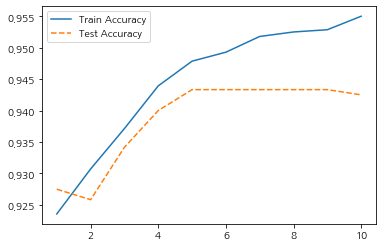

In [25]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

### Depth =5

##### min_samples_split 정하기

In [29]:
train_accuracy =[]; test_accuracy=[]; sub_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(max_depth=5,
                                min_samples_split=v_min_samples_split,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    sub_accuracy.append(abs(train_accuracy[-1]-test_accuracy[-1]))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split['Split']=para_split
df_accuracy_split['TrainAccuracy']=train_accuracy
df_accuracy_split['TestAccuracy']=test_accuracy
df_accuracy_split['SubAccuracy']=sub_accuracy
df_accuracy_split.round(3)

,Split,TrainAccuracy,TestAccuracy,SubAccuracy
0,10,0.948,0.943,0.005
1,20,0.946,0.939,0.007
2,30,0.942,0.933,0.009
3,40,0.938,0.931,0.007
4,50,0.938,0.931,0.007
5,60,0.938,0.931,0.007
6,70,0.938,0.931,0.007
7,80,0.938,0.931,0.007
8,90,0.938,0.931,0.007
9,100,0.938,0.931,0.007


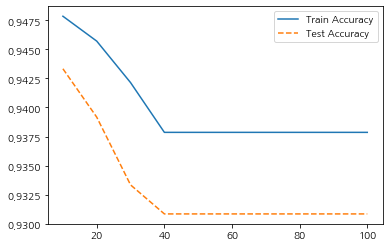

In [30]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

### Split = 40

##### min_samples_leaf정하기

In [32]:
train_accuracy =[]; test_accuracy=[]; sub_accuracy=[]

para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(max_depth=5,
                                min_samples_split=40,
                                min_samples_leaf=v_min_samples_leaf
                                ,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    sub_accuracy.append(abs(train_accuracy[-1]-test_accuracy[-1]))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['Leaf']=para_leaf
df_accuracy_leaf['TrainAccuracy']=train_accuracy
df_accuracy_leaf['TestAccuracy']=test_accuracy
df_accuracy_leaf['SubAccuracy']=sub_accuracy
df_accuracy_leaf.round(3)

,Leaf,TrainAccuracy,TestAccuracy,SubAccuracy
0,2,0.938,0.931,0.007
1,4,0.936,0.929,0.007
2,6,0.935,0.930,0.005
3,8,0.935,0.930,0.005
4,10,0.935,0.930,0.005
5,12,0.934,0.926,0.008
6,14,0.933,0.923,0.010
7,16,0.932,0.924,0.008
8,18,0.932,0.924,0.008
9,20,0.932,0.924,0.008


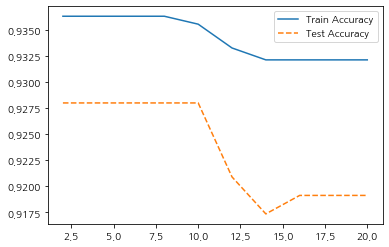

In [108]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Accuracy")
plt.legend()

### leaf = 10

##### 최종 모델 선정

In [33]:
tree_final = DecisionTreeClassifier(max_depth=5, min_samples_split=40,
                                   min_samples_leaf=10, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [34]:
tree_final.score(df_test_x, df_test_y)

0.93